## Resources

In [28]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker

In [29]:
import functions as fn

# See functions.py to see how the data is cleaned

df = fn.import_and_clean_data('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,age,state,bath_to_bed,zip
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520,52,Washington,0.250000,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910,71,Washington,0.500000,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200,65,Washington,0.333333,98178
5,2807100156,7/20/2021,625000.0,2,1.0,1190,5688,1.0,NO,NO,...,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155,73,Washington,0.500000,98133
6,5122400111,11/17/2021,1317227.0,3,3.0,2080,27574,1.0,NO,NO,...,150,1951,0,"2633 Southwest 164th Place, Burien, Washington...",47.455470,-122.367220,70,Washington,1.000000,98166


## EDA

In [30]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'age', 'state', 'bath_to_bed',
       'zip'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12832 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12832 non-null  int64  
 1   date           12832 non-null  object 
 2   price          12832 non-null  float64
 3   bedrooms       12832 non-null  int64  
 4   bathrooms      12832 non-null  float64
 5   sqft_living    12832 non-null  int64  
 6   sqft_lot       12832 non-null  int64  
 7   floors         12832 non-null  float64
 8   waterfront     12832 non-null  object 
 9   greenbelt      12832 non-null  object 
 10  nuisance       12832 non-null  object 
 11  view           12832 non-null  object 
 12  condition      12832 non-null  int64  
 13  grade          12832 non-null  int64  
 14  heat_source    12832 non-null  object 
 15  sewer_system   12832 non-null  object 
 16  sqft_above     12832 non-null  int64  
 17  sqft_basement  12832 non-null  int64  
 18  sqft_g

In [32]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age,bath_to_bed
count,1.283200e+04,1.283200e+04,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.00000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000
mean,4.461447e+09,9.343150e+05,3.241116,1.851621,1726.036393,10301.686721,1.196150,3.680486,6.997117,1385.53538,574.179161,171.159523,157.014963,1945.083463,171.836736,47.564903,-122.271882,75.916537,0.585997
std,2.820651e+09,5.213920e+05,0.997073,0.770884,683.237186,12516.420694,0.355851,0.789120,0.845610,499.36629,547.639318,214.113876,185.027750,19.393287,560.119661,0.134117,0.110596,19.393287,0.214453
min,1.000055e+06,2.736000e+04,0.000000,0.000000,260.000000,648.000000,1.000000,1.000000,3.000000,260.00000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.165650,-122.526650,50.000000,0.000000
25%,2.061100e+09,5.800000e+05,3.000000,1.000000,1210.000000,5274.250000,1.000000,3.000000,7.000000,1040.00000,0.000000,0.000000,0.000000,1929.000000,0.000000,47.482310,-122.350804,60.000000,0.500000
50%,3.878900e+09,8.050000e+05,3.000000,2.000000,1620.000000,7612.500000,1.000000,4.000000,7.000000,1300.00000,630.000000,0.000000,100.000000,1950.000000,0.000000,47.575073,-122.300145,71.000000,0.500000
75%,7.168450e+09,1.150000e+06,4.000000,2.000000,2130.000000,10088.000000,1.500000,4.000000,7.000000,1630.00000,1040.000000,340.000000,240.000000,1961.000000,0.000000,47.678521,-122.209464,92.000000,0.666667
max,9.904000e+09,3.750000e+06,9.000000,7.500000,4280.000000,161607.000000,3.000000,5.000000,12.000000,5500.00000,1940.000000,780.000000,940.000000,1971.000000,2022.000000,47.777640,-121.163960,121.000000,3.000000


In [33]:
df = df[df['age'] > 49]
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,age,bath_to_bed
count,1.283200e+04,1.283200e+04,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.00000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000,12832.000000
mean,4.461447e+09,9.343150e+05,3.241116,1.851621,1726.036393,10301.686721,1.196150,3.680486,6.997117,1385.53538,574.179161,171.159523,157.014963,1945.083463,171.836736,47.564903,-122.271882,75.916537,0.585997
std,2.820651e+09,5.213920e+05,0.997073,0.770884,683.237186,12516.420694,0.355851,0.789120,0.845610,499.36629,547.639318,214.113876,185.027750,19.393287,560.119661,0.134117,0.110596,19.393287,0.214453
min,1.000055e+06,2.736000e+04,0.000000,0.000000,260.000000,648.000000,1.000000,1.000000,3.000000,260.00000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.165650,-122.526650,50.000000,0.000000
25%,2.061100e+09,5.800000e+05,3.000000,1.000000,1210.000000,5274.250000,1.000000,3.000000,7.000000,1040.00000,0.000000,0.000000,0.000000,1929.000000,0.000000,47.482310,-122.350804,60.000000,0.500000
50%,3.878900e+09,8.050000e+05,3.000000,2.000000,1620.000000,7612.500000,1.000000,4.000000,7.000000,1300.00000,630.000000,0.000000,100.000000,1950.000000,0.000000,47.575073,-122.300145,71.000000,0.500000
75%,7.168450e+09,1.150000e+06,4.000000,2.000000,2130.000000,10088.000000,1.500000,4.000000,7.000000,1630.00000,1040.000000,340.000000,240.000000,1961.000000,0.000000,47.678521,-122.209464,92.000000,0.666667
max,9.904000e+09,3.750000e+06,9.000000,7.500000,4280.000000,161607.000000,3.000000,5.000000,12.000000,5500.00000,1940.000000,780.000000,940.000000,1971.000000,2022.000000,47.777640,-121.163960,121.000000,3.000000


In [34]:
print(df['sqft_living'].sort_values(ascending = False))

1473     4280
4238     4280
11611    4250
5296     4240
7766     4220
         ... 
476       320
11420     320
11989     310
23622     290
8694      260
Name: sqft_living, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

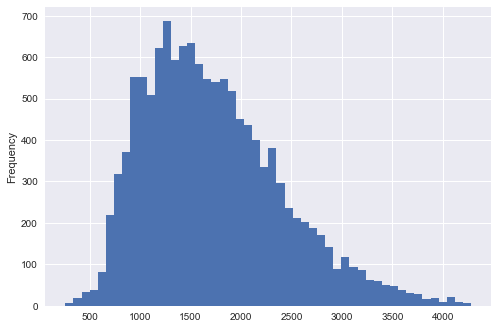

In [35]:
df['sqft_living'].plot(kind = 'hist', bins = 50)

In [36]:
print(df['sqft_lot'].sort_values(ascending = False))

4878     161607
3543     159865
6256     156162
29835    155509
19787    154202
          ...  
13100       919
23894       917
6810        900
21237       800
17155       648
Name: sqft_lot, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

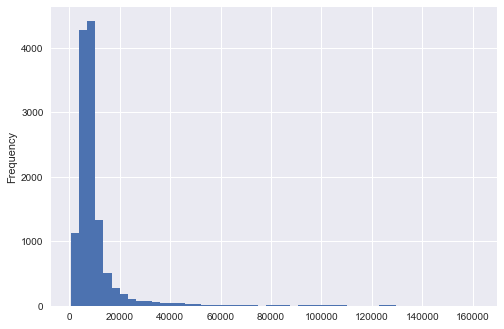

In [37]:
df['sqft_lot'].plot(kind = 'hist', bins = 50)

In [38]:
print(df['bedrooms'].sort_values(ascending = False))

21623    9
7766     9
11275    9
4089     9
9455     9
        ..
11471    0
12473    0
9487     0
14636    0
1310     0
Name: bedrooms, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

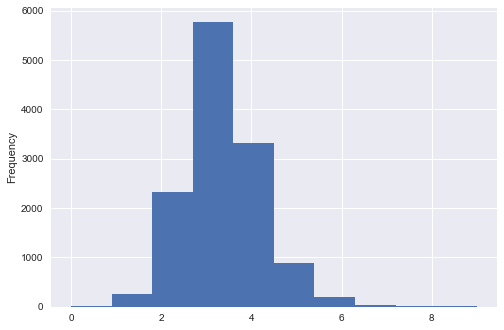

In [39]:
df['bedrooms'].plot(kind = 'hist', bins = 10)

In [40]:
print(df['bathrooms'].sort_values(ascending = False))

657      7.5
21623    7.5
5089     6.5
28471    6.0
631      6.0
        ... 
3859     0.5
8468     0.0
1310     0.0
1952     0.0
29732    0.0
Name: bathrooms, Length: 12832, dtype: float64


<AxesSubplot:ylabel='Frequency'>

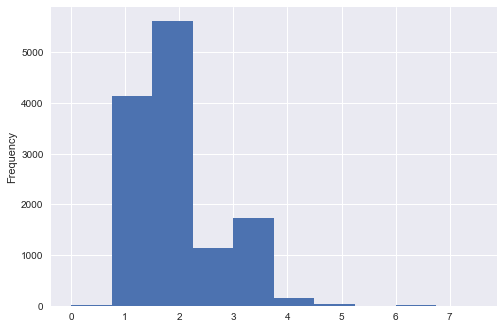

In [41]:
df['bathrooms'].plot(kind = 'hist', bins = 10)

In [42]:
print(df['condition'].sort_values(ascending = False))

19705    5
7555     5
7630     5
3939     5
13908    5
        ..
17906    1
28129    1
26052    1
23335    1
2069     1
Name: condition, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

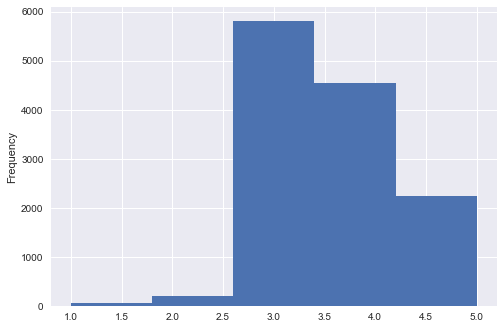

In [43]:
df['condition'].plot(kind = 'hist', bins = 5)

In [44]:
print(df['grade'].sort_values(ascending = False))

6903     12
10047    11
22845    11
1082     11
3945     11
         ..
28397     3
21804     3
8468      3
29732     3
9487      3
Name: grade, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

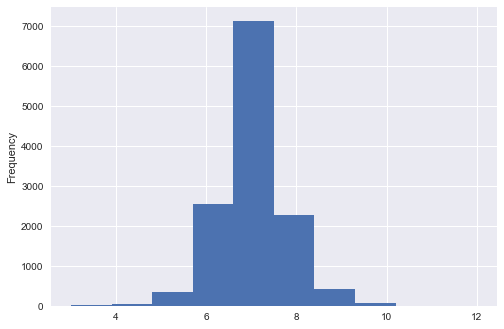

In [45]:
df['grade'].plot(kind = 'hist', bins = 10)

In [46]:
print(df['sqft_basement'].sort_values(ascending = False))

2907     1940
23898    1940
24839    1930
21590    1930
20798    1930
         ... 
16319       0
16324       0
16327       0
16339       0
0           0
Name: sqft_basement, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

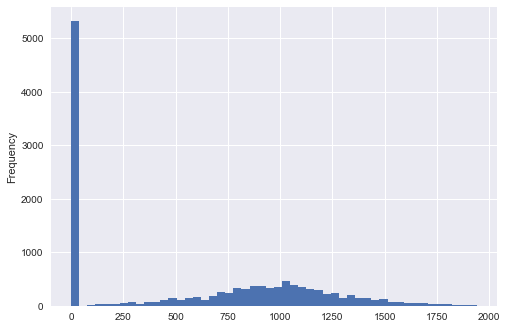

In [47]:
df['sqft_basement'].plot(kind = 'hist', bins = 50)

In [48]:
print(df['sqft_patio'].sort_values(ascending = False))

26205    940
19872    940
28878    940
24303    940
18763    940
        ... 
15156      0
15165      0
15169      0
15171      0
15128      0
Name: sqft_patio, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

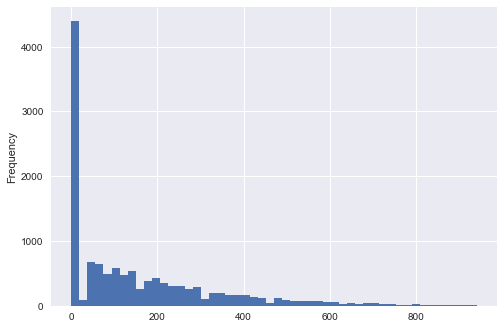

In [49]:
df['sqft_patio'].plot(kind = 'hist', bins = 50)

In [50]:
print(df['sqft_garage'].sort_values(ascending = False))

23968    780
1638     780
28423    780
9445     780
4451     780
        ... 
17291      0
17287      0
17280      0
17279      0
0          0
Name: sqft_garage, Length: 12832, dtype: int64


<AxesSubplot:ylabel='Frequency'>

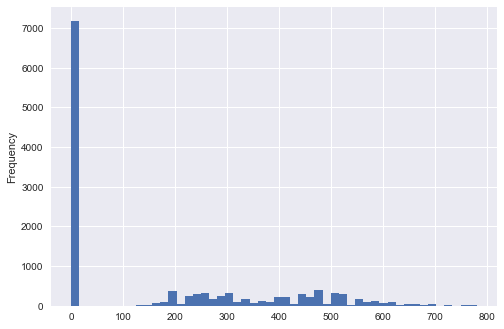

In [51]:
df['sqft_garage'].plot(kind = 'hist', bins = 50)

In [52]:
df_reno = df.copy()
df_reno['Renovation'] = df_reno['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)


NameError: name 'historic' is not defined

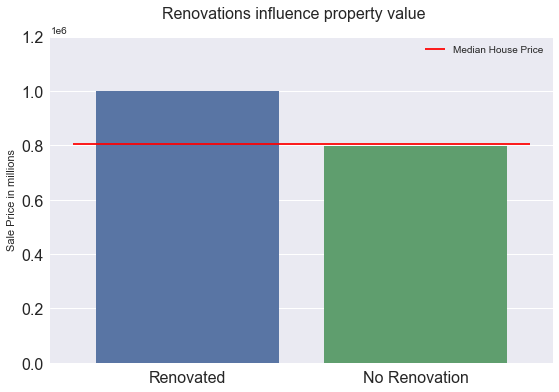

In [53]:
renovated = df_reno[(df_reno["Renovation"] == 1)]
renovated_median = renovated.price.median()
no_renovation = df_reno[(df_reno["Renovation"] == 0)]
no_renovation_median = no_renovation.price.median()

label_renovation = ["Renovated", "No Renovation"]
values_renovation = [renovated_median, no_renovation_median]

fig, ax = plt.subplots( figsize=(9,6))
sns.barplot(ax=ax, x=label_renovation, y=values_renovation )
# ax.get_yaxis().set_major_formatter(
#     plt.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.suptitle("Renovations influence property value", size=16, y=.95)
ax.hlines(df_reno['price'].median(), -.5 ,1.5, colors="red", label="Median House Price")
ax.set_ylim(0,1.2*renovated_median)
ax.legend()
ax.set_ylabel("Sale Price in millions")
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# ylabels = ['{:,.2f}'.format(y) + 'K' for x in ax.get_yticks()/1000]
# ax.set_yticklabels(ylabels)
# # plt.yticks([0, 4000, 8000, 10000, 12000, 14000])

## Model Exploration

In [ ]:

df = df.drop(['id', 'date', 'sqft_lot', 'sqft_above', 'floors', 'yr_built', 'yr_renovated', 'lat', 'long', 'waterfront', 'greenbelt', 'nuisance', 'view', 'heat_source', 'sewer_system', 'address', 'age', 'state', 'zip'], axis=1)
df.head()

In [ ]:

df.corr()

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))

sns.heatmap(df.corr().abs(), annot=True)

In [ ]:
formula = "price ~ sqft_living"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

In [ ]:
formula = "price ~ sqft_living + grade + sqft_patio"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

In [ ]:
dflog = df.copy()

In [ ]:
# dflog['bathbed'] = dflog['bathrooms'] / dflog['bedrooms']
# median_bathbed = dflog['bathbed'].median()
# dflog.replace([np.inf, -np.inf], median_bathbed, inplace=True)
# dflog.fillna(median_bathbed, inplace=True)
# dflog['bathbed'].value_counts()

In [ ]:
#list for cols to scale
cols_to_scale = ['sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'bedrooms', 'bathrooms']

#create and fit scaler
scaler = StandardScaler()
scaler.fit(dflog[cols_to_scale])

#scale selected data
dflog[cols_to_scale] = scaler.transform(dflog[cols_to_scale])
dflog


In [ ]:
dflog['b2bscaled'] = dflog['bathrooms'] * dflog['bedrooms']
dflog

## Good

In [ ]:
target = dflog['price']
predictors = dflog.drop(['price', 'bath_to_bed'], axis=1)
predictors = sm.add_constant(predictors)
model = sm.OLS(target, predictors).fit()
model.summary()

In [ ]:
lr = LinearRegression()
lr.fit(predictors, target)
lr.score(predictors, target)

In [ ]:
y_hat = lr.predict(predictors)
y_hat

In [ ]:
y_hat = lr.predict(predictors)
resid = (target - y_hat)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y_hat, target)

In [ ]:
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x/1000000))

In [ ]:
fig, ax = plt.subplots(figsize = (10,16))
sns.scatterplot(x = y_hat, y = target, ax=ax)
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))
sns.regplot(x = y_hat, y = target, line_kws={"color": "orange"})
ax.set(ylabel=None)
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x/1000000))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
sns.set_style(style='white')

In [ ]:
predictors.columns

## Presentation Calcs
sqft_living 1.497e+05, std = 713.6434149039003

condition 3.083e+04, std = 0.7895859397473242

grade 2.31e+05, std = 0.8685869710286127

sqft_basement 2.072e+04, std = 553.9285173565767

sqft_patio 1.38e+04, std= 193.89617631732378

bath_to_bed 2.607e+05, std = 0.21532773323288892

In [ ]:
print(df['sqft_living'].std())
print(df['condition'].std())
print(df['grade'].std())
print(df['sqft_basement'].std())
print(df['sqft_patio'].std())
print(df['bath_to_bed'].std())

Add 400 sqft room = increase value by $85,000

Raise condition by 1 = $31,000

Raise grade by 1 = increase value by $231,000

Basement extensions = 37$ per sqft

Add medium patio of 168 sqft = $12,000

Add bathroom to a 3bed = $48,000

https://www.landscapingnetwork.com/patios/size.html

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df['bath_to_bed'], df['price'])

In [ ]:
df['bedrooms'].mean()

### Formula for Adding a Bathroom

In [ ]:
a = 54480 # the coefficient of bathrooms_scaled
b = -75840 # the coefficient of bedrooms_scaled
c = 23060 # the coefficient of bathrooms_scaled*bedrooms_scaled
# d = number of bedrooms
# e = mean number of bedrooms in the dataset

In [ ]:
d = 3
e = 3.25
a + c * (d - e)

In [ ]:
low_grade = df[df['grade']<7]
average_grade = df[(df['grade'] == 7)]
high_grade = df[df['grade']>7]
low_median = low_grade['price'].median()
average_median = average_grade['price'].median()
high_median = high_grade['price'].median()

In [ ]:
grade_values = [low_median, average_median, high_median]
grade_keys = ['Low Grade', 'Average Grade', 'Above Average Grade']
sns.set(rc = {'figure.figsize':(9,9)})
sns.set_style(style='white')
sns.barplot(x=grade_keys, y=grade_values).set(title='Median Price Based on Grade', xlabel='Grade', ylabel='Median Price(millions)');
plt.ticklabel_format(style='sci', axis='y',useOffset=True)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)